In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg
import geopandas as geo

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [272]:
cc = pd.read_csv('CC_Bottle_Cast.csv')
chlor = cc['ChlorA']
cc=cc[(cc['Year']>=2014)]
cc=cc[(cc['Year']<=2019)]
#cc=cc[['Cruise_ID', 'Temp', 'Silicate', 'Phosphate', 'Nitrogen', 'Month', 'Year', 'Lat_Dec', 'Lon_Dec', 'ChlorA']]
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28405 entries, 193183 to 221587
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cast_Count     28405 non-null  int64  
 1   Depth          28405 non-null  int64  
 2   Temp           28405 non-null  float64
 3   Silicate       28405 non-null  float64
 4   Phosphate      28405 non-null  float64
 5   ChlorA         28405 non-null  float64
 6   Light_Percent  2393 non-null   float64
 7   Cruise_ID      28405 non-null  object 
 8   Station_ID     28405 non-null  object 
 9   Date           28405 non-null  object 
 10  Lat_Dec        28405 non-null  float64
 11  Lon_Dec        28405 non-null  float64
 12  Year           28405 non-null  int64  
 13  Month          28405 non-null  int64  
 14  Day            28405 non-null  int64  
 15  Nitrogen       28405 non-null  float64
dtypes: float64(8), int64(5), object(3)
memory usage: 3.7+ MB


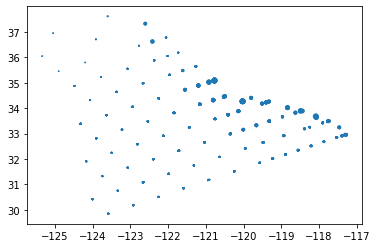

In [273]:
plt.scatter(cc['Lon_Dec'], cc['Lat_Dec'], s=cc['ChlorA'])

In [274]:
data2014 = cc[cc['Year']==2014]
data2015 = cc[cc['Year']==2015]
data2016 = cc[cc['Year']==2016]
data2017 = cc[cc['Year']==2017]
data2018 = cc[cc['Year']==2018]
data2019 = cc[cc['Year']==2019]
#data2020 = prediction_data

# Plotting Yearly Data

In [210]:
xticks = range(math.floor(cc['Lon_Dec'].min()), math.ceil(cc['Lon_Dec'].max())+1)
yticks = range(math.floor(cc['Lat_Dec'].min()), math.ceil(cc['Lat_Dec'].max())+1)

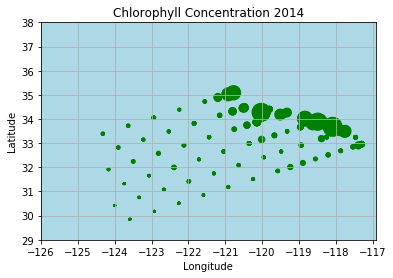

In [314]:
fig, ax = plt.subplots()
ax.set_facecolor('lightblue')
plt.scatter(data2014['Lon_Dec'], data2014['Lat_Dec'], s=data2014['ChlorA']*15, color='green')
plt.title("Chlorophyll Concentration 2014")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xticks(ticks=xticks)
plt.yticks(ticks=yticks)
plt.grid()
plt.savefig('2014CC.png')
plt.show()

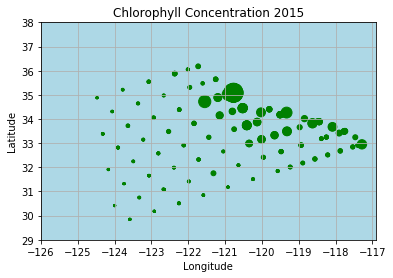

In [315]:
fig, ax = plt.subplots()
ax.set_facecolor('lightblue')
plt.scatter(data2015['Lon_Dec'], data2015['Lat_Dec'], s=data2015['ChlorA']*15, color='green')
plt.title("Chlorophyll Concentration 2015")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xticks(ticks=xticks)
plt.yticks(ticks=yticks)
plt.grid()
plt.savefig('2015CC.png')
plt.show()

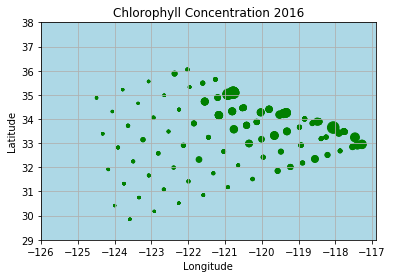

In [316]:
fig, ax = plt.subplots()
ax.set_facecolor('lightblue')
plt.scatter(data2016['Lon_Dec'], data2016['Lat_Dec'], s=data2016['ChlorA']*15, color='green')
plt.yticks(ticks=yticks)
plt.xticks(ticks=xticks)
plt.title("Chlorophyll Concentration 2016")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.savefig('2016CC.png')
plt.show()

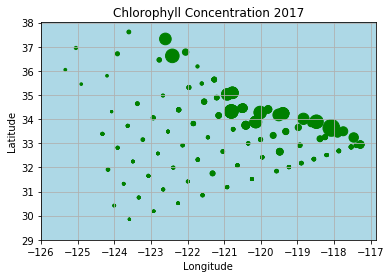

In [317]:
fig, ax = plt.subplots()
ax.set_facecolor('lightblue')
plt.scatter(data2017['Lon_Dec'], data2017['Lat_Dec'], s=data2017['ChlorA']*15, color='green')
plt.title("Chlorophyll Concentration 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(ticks=yticks)
plt.xticks(ticks=xticks)
plt.grid()
plt.savefig('2017CC.png')
plt.show()

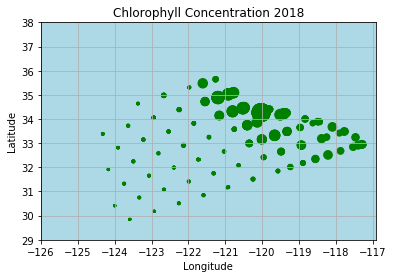

In [318]:
fig, ax = plt.subplots()
ax.set_facecolor('lightblue')
plt.scatter(data2018['Lon_Dec'], data2018['Lat_Dec'], s=data2018['ChlorA']*15, color='green')
plt.title("Chlorophyll Concentration 2018")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(ticks=yticks)
plt.xticks(ticks=xticks)
plt.grid()
plt.savefig('2018CC.png')
plt.show()


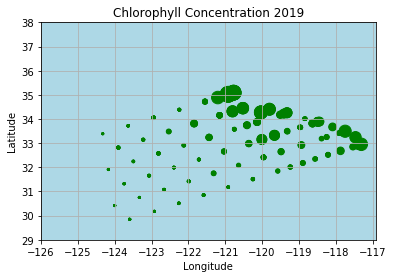

In [319]:
fig, ax = plt.subplots()
ax.set_facecolor('lightblue')
plt.scatter(data2019['Lon_Dec'], data2019['Lat_Dec'], s=data2019['ChlorA']*15, color='green')
plt.title("Chlorophyll Concentration 2019")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(ticks=yticks)
plt.xticks(ticks=xticks)
plt.grid()
plt.savefig('2019CC.png')
plt.show()

# Using Prediction Data from Phytoplankton algos file


In [320]:
temp2 = cc[['Depth', 'Temp', 'Silicate', 'Phosphate', 'Nitrogen', 'ChlorA', 
            'Month', 'Year', 'Lat_Dec', 'Lon_Dec']]
temp2.dropna(inplace=True)
temp2=temp2[temp2['Year']==2019] #Shortened prediction data to just predict change in temperature from 2019 data
X2 = temp2[['Depth', 'Temp', 'Silicate', 'Phosphate', 'Nitrogen', 'Month', 'Year', 'Lat_Dec', 'Lon_Dec']]
y2 = temp2['ChlorA']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)
temp2.head()

C:\Users\sheld\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Depth,Temp,Silicate,Phosphate,Nitrogen,ChlorA,Month,Year,Lat_Dec,Lon_Dec
217651,0,14.302,4.59,0.42,2.584,1.518,2,2019,34.4515,-120.523
217652,2,14.302,4.59,0.42,2.584,1.518,2,2019,34.4515,-120.523
217653,10,14.309,4.56,0.42,2.500,1.495,2,2019,34.4515,-120.523
217654,20,14.312,4.54,0.43,2.522,1.542,2,2019,34.4515,-120.523
217655,30,14.154,5.23,0.51,3.820,1.048,2,2019,34.4515,-120.523


In [324]:

et = ExtraTreesRegressor(n_jobs=-1,
                        random_state=1 #Random State gives consistent output for each run
                        ).fit( X_train2, y_train2)
print('extra trees regressor trianing & testing scores:')
print(et.score(X_train2, y_train2))
print(et.score(X_test2, y_test2))
prediction_data = pd.read_csv('CC_Bottle_Cast.csv')

# add 2 degrees to each item in temp column
def add_two(x):
	return x + 2

temp2['Temp'] = temp2['Temp'].apply(add_two)

X3 = temp2[['Depth', 'Temp', 'Silicate', 'Phosphate', 'Nitrogen', 'Month', 'Year', 'Lat_Dec', 'Lon_Dec']]
y3 = temp2['ChlorA']
predictions = et.predict(X3)
print(predictions)

extra trees regressor trianing & testing scores:
1.0
0.848729793849132
[1.69042 1.69042 1.68859 ... 1.90681 2.37252 2.98657]


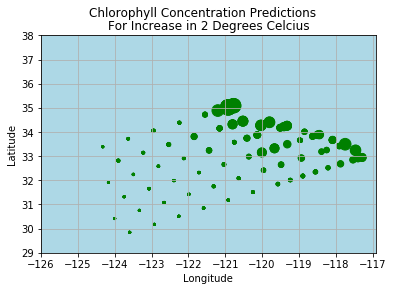

In [325]:
fig, ax = plt.subplots()
ax.set_facecolor('lightblue')
plt.scatter(temp2['Lon_Dec'], temp2['Lat_Dec'], s=predictions*15, color='green')
plt.suptitle("Chlorophyll Concentration Predictions")
plt.title("For Increase in 2 Degrees Celcius")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.yticks(ticks=yticks)
plt.xticks(ticks=xticks)
plt.grid()
plt.savefig('PredCC.png')
plt.show()